In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
충전소대수_df=pd.read_excel('C:/Users/master/Documents/DNA(공모전)/EDA/격자+교통량 데이터(k=2)+전기자동차 데수 데이터(k=3).xlsx')

In [3]:
충전소대수_df.drop(columns=['Unnamed: 0'] , inplace=True)

#### Data Exploration

In [4]:
충전소대수_df.describe()

,b_ratio,f_ratio,num_b,r_area,land_price,일통행량,num,pop,wpop_rate,apop_rate,gid_y
count,575.000000,575.000000,575.000000,575.000000,5.750000e+02,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000
mean,48.163843,161.321774,974.182609,179.637809,4.062489e+06,35012.528699,110.548648,16276.206957,0.700267,0.204405,0.823834
std,12.279305,72.597598,899.575939,93.286647,3.983241e+06,17464.401017,240.952708,11775.785910,0.103872,0.076422,0.995687
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4708.913410,10.955284,6.000000,0.000000,0.000000,0.000000
25%,46.730000,141.020000,188.500000,138.800000,1.599532e+06,22088.739281,40.026918,5746.000000,0.688037,0.168486,0.000000
50%,52.880000,162.960000,681.000000,178.550000,3.067997e+06,31724.815339,59.387668,15207.000000,0.708970,0.196726,0.528281
75%,55.165000,185.795000,1613.000000,226.495000,5.022247e+06,41761.952136,91.635565,25425.500000,0.734607,0.229303,1.308550
max,65.370000,756.630000,3887.000000,609.310000,2.956796e+07,111790.658036,3162.303499,45362.000000,1.000000,0.860000,5.394366


In [5]:
y_target=충전소대수_df['gid_y']
X_features=충전소대수_df.drop(columns=['gid_y'], axis=1, inplace=False)

#### check the distribution of y_target, X_features

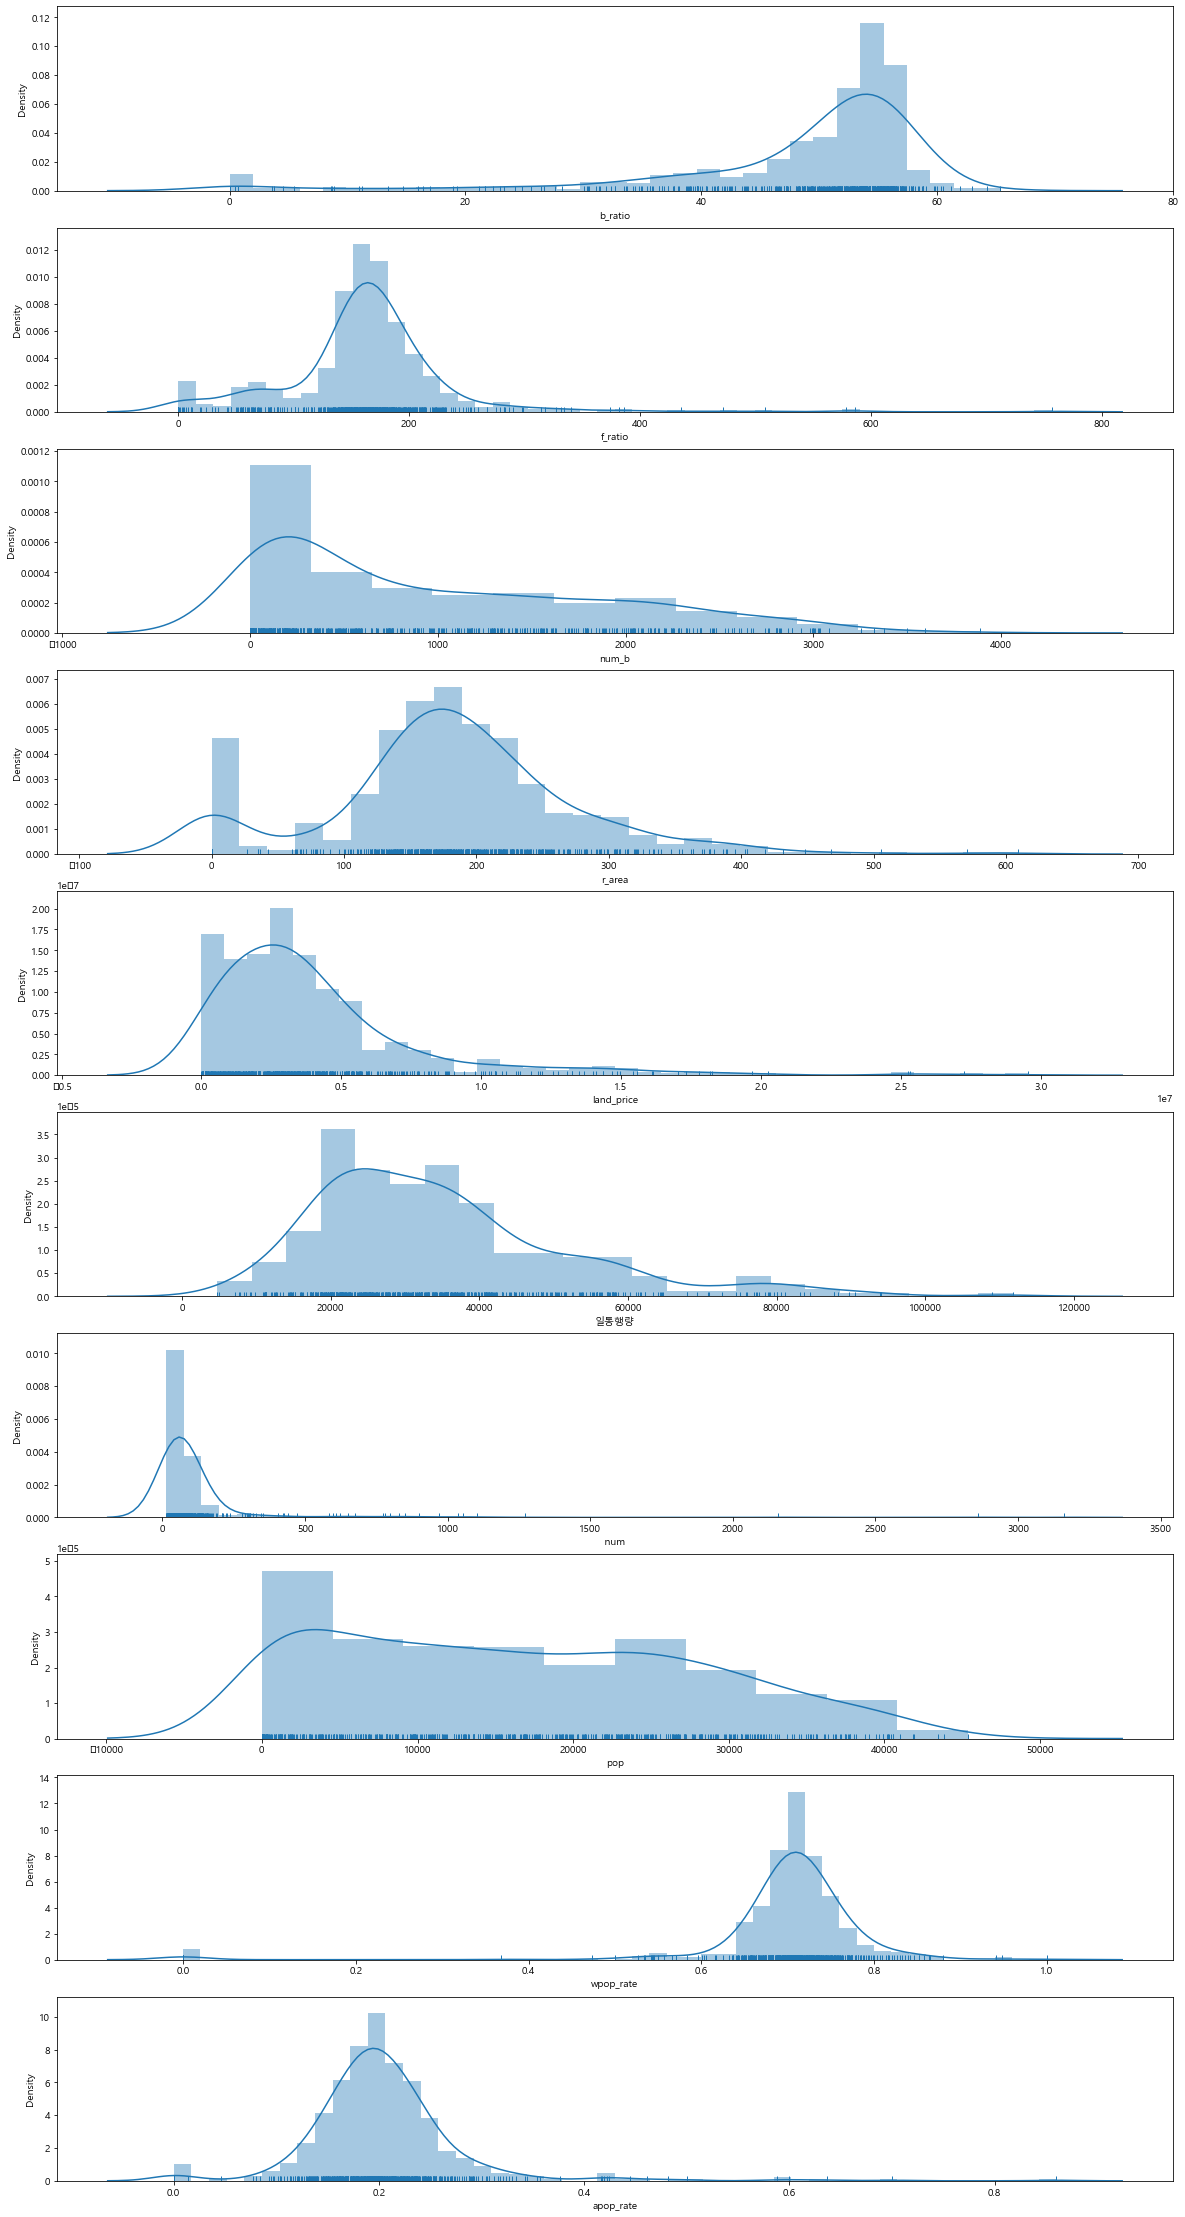

In [6]:
#distribution of X_features
fig, ax = plt.subplots(nrows=len(X_features.columns), figsize=(20,40))
for i, column in enumerate(X_features.columns):
    sns.distplot(X_features[column], kde=True, rug=True, ax=ax[i])

In [7]:
y_target.value_counts() #y_target 0 : 215 , 0 아닌값 : 361-215=146개 존재

0.000000    215
1.529761      1
1.203386      1
2.578559      1
0.928618      1
           ... 
1.346089      1
0.656387      1
0.375656      1
1.312014      1
1.045782      1
Name: gid_y, Length: 361, dtype: int64

<AxesSubplot:xlabel='gid_y', ylabel='Density'>

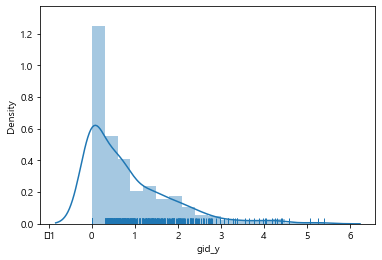

In [8]:
#distribution of y_target
sns.distplot(y_target,kde=True, rug=True)

#### feature 시각화

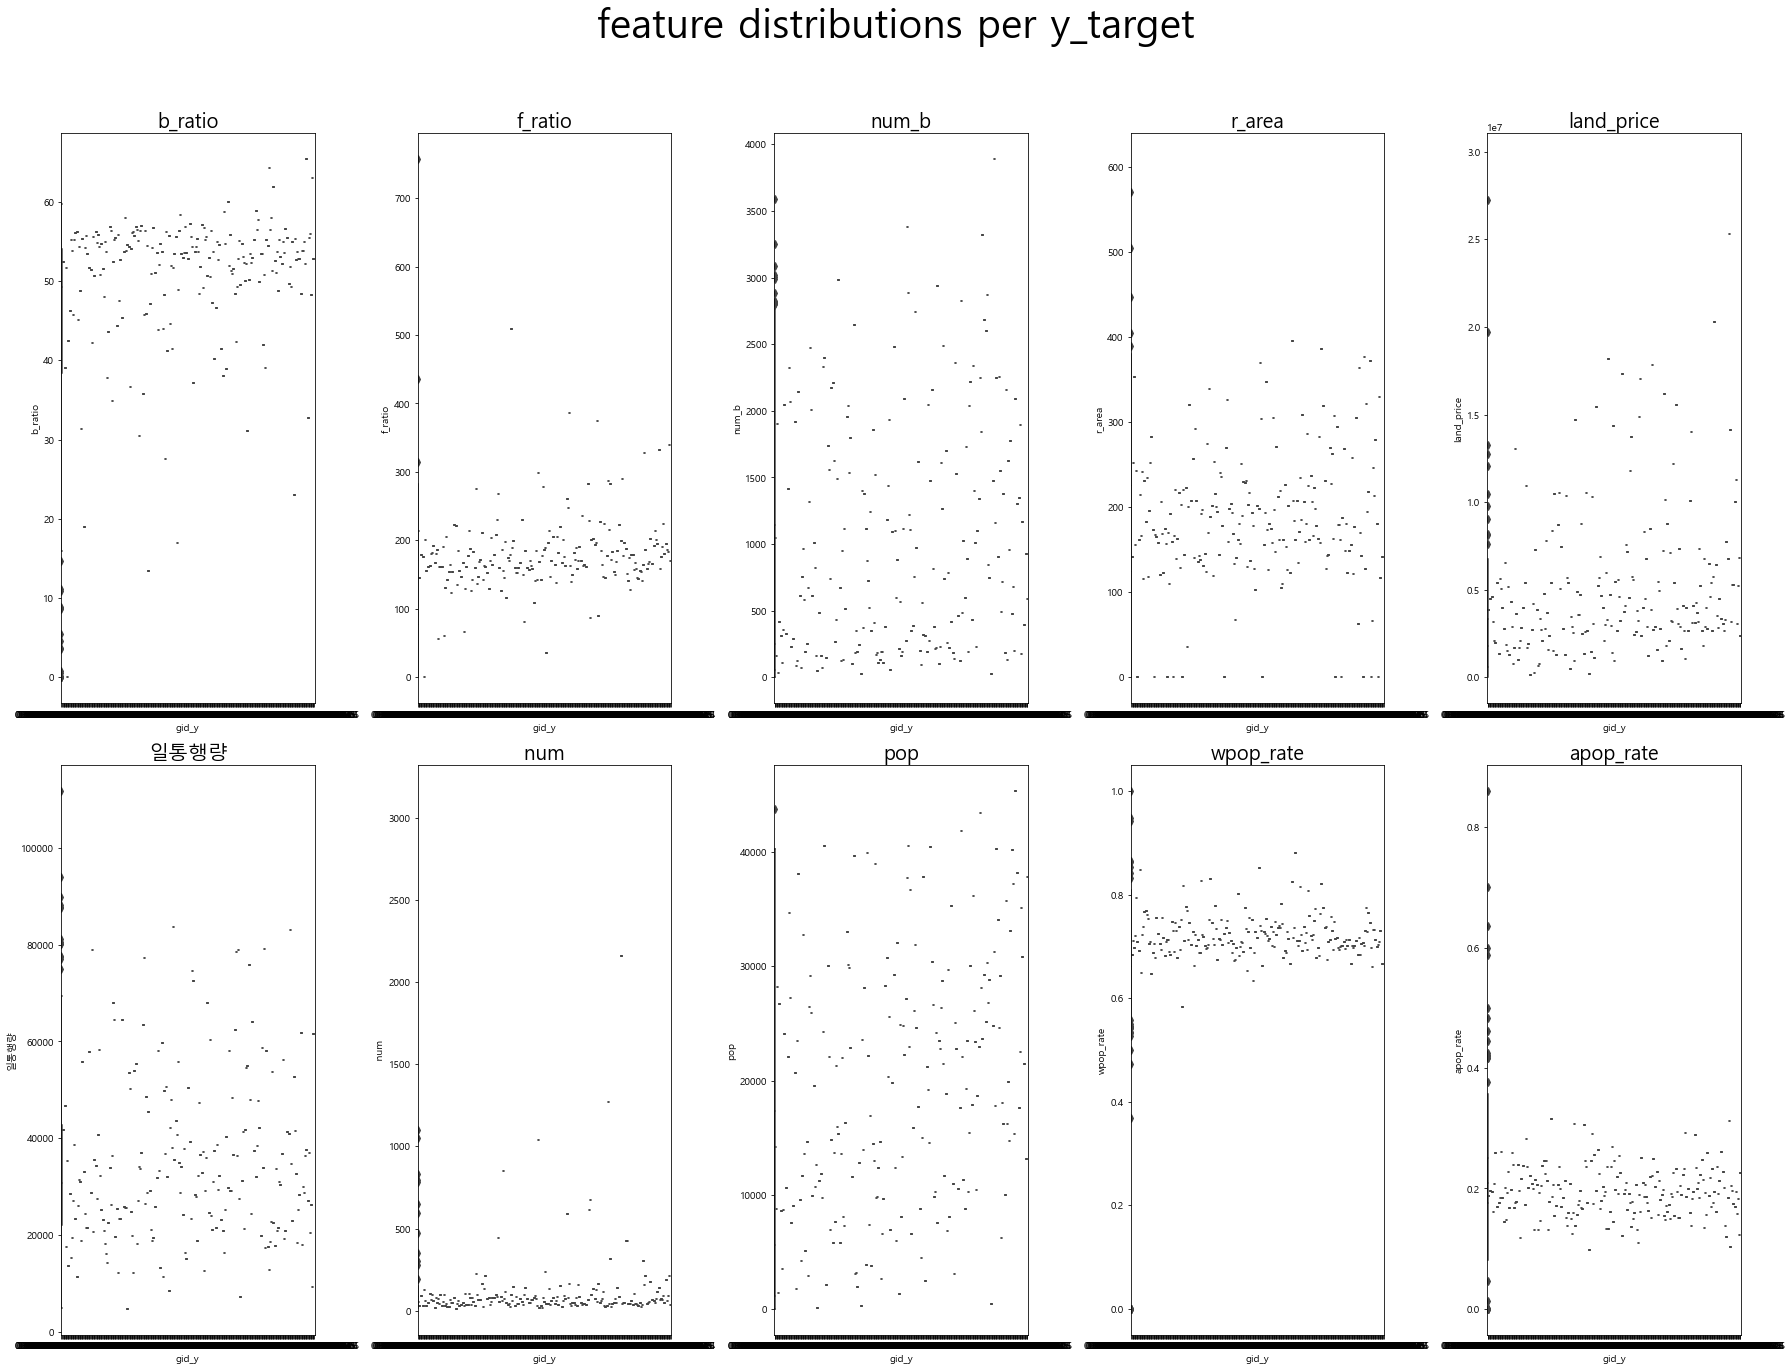

In [9]:
#boxplot
# 박스플롯
fig, axes = plt.subplots(2, 5, figsize=(25, 20))   # plt.subplots()는 figure, axes 포함하는 tuple을 반환하는 함수

fig.suptitle('feature distributions per y_target', fontsize= 40)
for ax, col in zip(axes.flat, 충전소대수_df.columns[:-1]):   # axes.flat: subplot으로부터 반환된 axes 값을 ndarray 형태로 펼침 / columns 중에서 target은 제외
    sns.boxplot(x= 'gid_y', y= col, ax=ax, data=충전소대수_df)   # target에 대해 각 column에 대한 상자그림을 그려줌
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

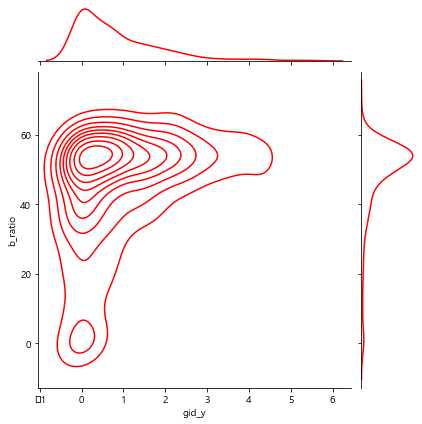

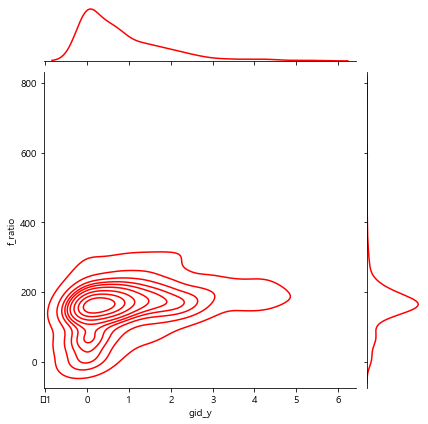

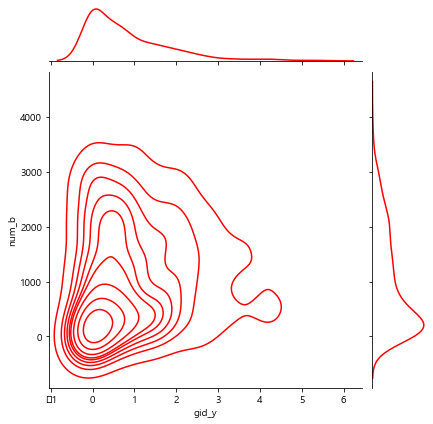

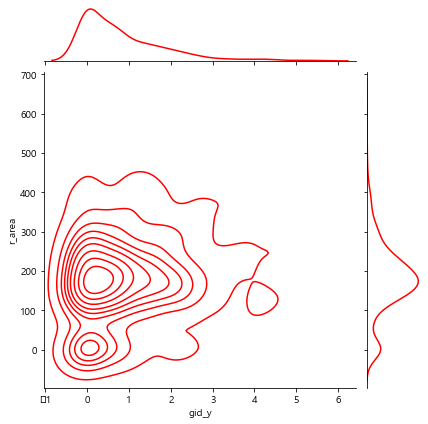

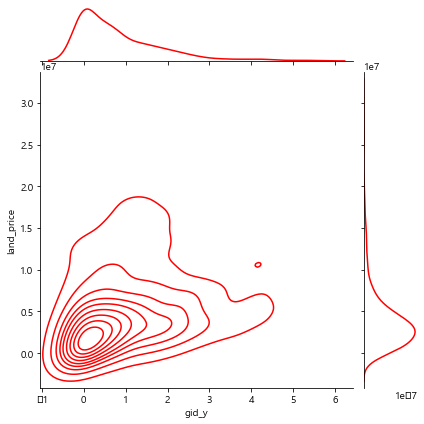

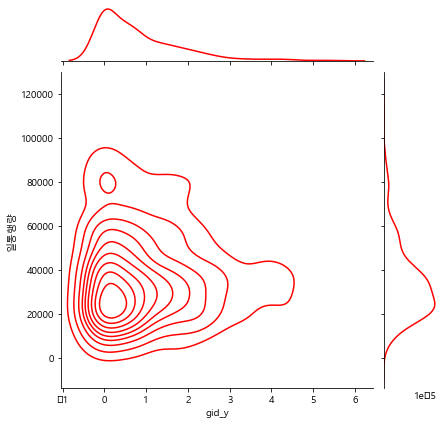

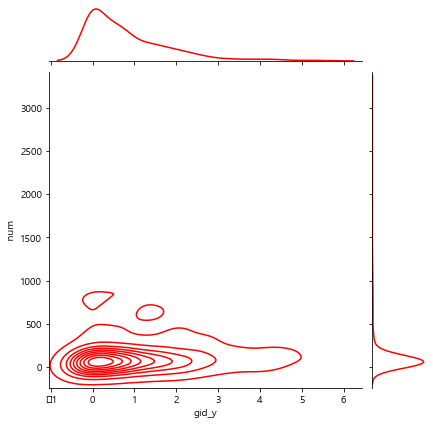

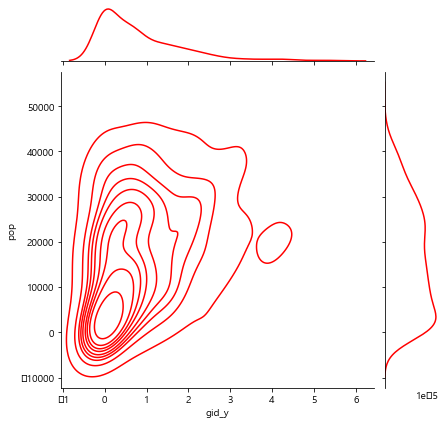

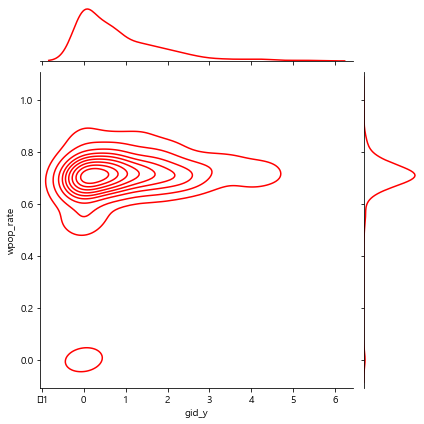

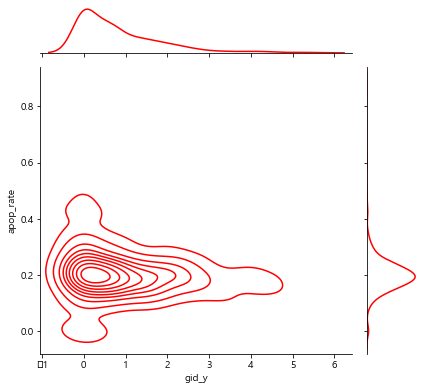

In [10]:
# jointplot

for ax, col in zip(axes.flat, 충전소대수_df.columns[:-1]):   # axes.flat: subplot으로부터 반환된 axes 값을 ndarray 형태로 펼침 / columns 중에서 target은 제외
    sns.jointplot(x= 'gid_y', y= col, ax=ax, data=충전소대수_df, kind="kde", color="r")   # target에 대해 각 column에 대한 상자그림을 그려줌
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

#### corr between features

<AxesSubplot:>

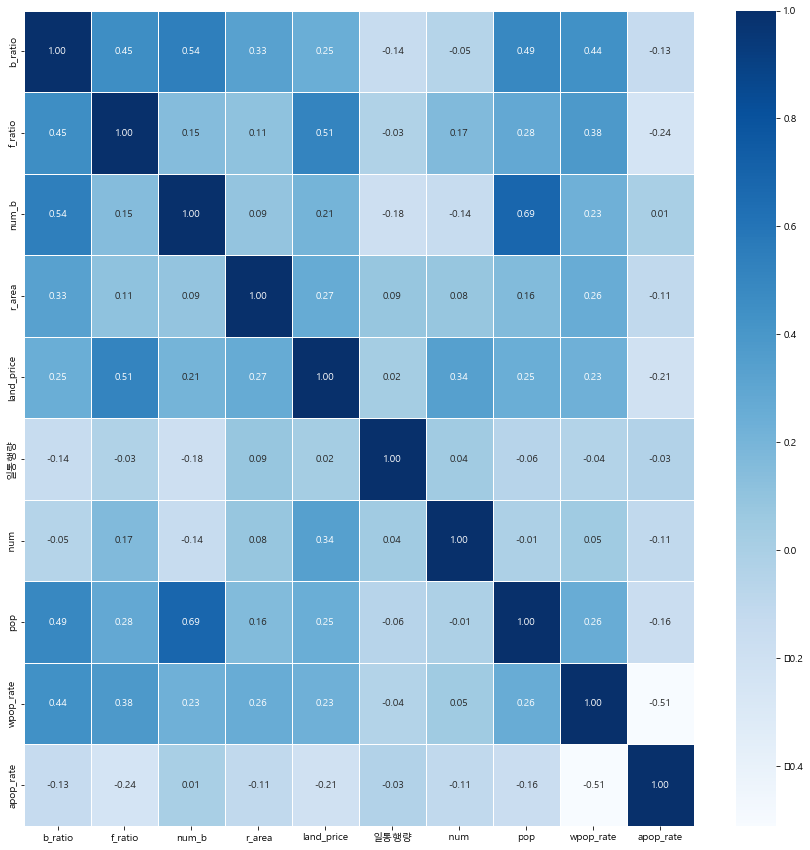

In [11]:
#corr 확인
plt.figure(figsize=(15,15))
sns.heatmap(data =X_features.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues') #다중공산성 거의 없음


### Check the train and test set ( i.i.d 체크)
 - min, max, mean ,std values for train and test data looks quite close인지 확인
 - train , test 의   density distribution 확인
 

In [12]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test, y_train, y_test =train_test_split(X_features, y_target, test_size=0.3, random_state=0)

In [13]:
train_df=pd.merge(X_train, y_train, left_index=True, right_index=True)
test_df=pd.merge(X_test, y_test, left_index=True, right_index=True)

In [14]:
train_df.shape, test_df.shape

((402, 11), (173, 11))

In [15]:
train_df.describe()

,b_ratio,f_ratio,num_b,r_area,land_price,일통행량,num,pop,wpop_rate,apop_rate,gid_y
count,402.000000,402.000000,402.000000,402.000000,4.020000e+02,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,48.282463,161.951045,959.300995,178.129950,4.106231e+06,34004.756086,111.810141,15836.723881,0.701675,0.204006,0.803199
std,12.108933,73.180734,897.742023,90.556603,4.111930e+06,17468.270245,240.784533,11703.247932,0.100111,0.073812,0.938082
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,4708.913410,10.955284,6.000000,0.000000,0.000000,0.000000
25%,47.005000,140.720000,184.250000,138.100000,1.575155e+06,21331.471142,40.072476,5081.250000,0.689351,0.168030,0.000000
50%,52.760000,162.570000,670.000000,177.480000,3.019024e+06,30872.905371,59.355776,14500.500000,0.708852,0.195640,0.525273
75%,55.100000,185.500000,1580.500000,221.442500,5.113542e+06,41165.287766,88.968381,25006.000000,0.734229,0.230961,1.299487
max,62.970000,756.630000,3887.000000,570.310000,2.956796e+07,111790.658036,3162.303499,45362.000000,0.948345,0.860000,5.058811


In [16]:
test_df.describe()

,b_ratio,f_ratio,num_b,r_area,land_price,일통행량,num,pop,wpop_rate,apop_rate,gid_y
count,173.000000,173.000000,173.000000,173.000000,1.730000e+02,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,47.888208,159.859538,1008.763006,183.141618,3.960847e+06,37354.289336,107.617317,17297.433526,0.696995,0.205333,0.871783
std,12.697864,71.412803,905.486588,99.526175,3.676252e+06,17279.295810,242.017095,11914.092970,0.112362,0.082384,1.119623
min,0.000000,0.000000,0.000000,0.000000,1.670551e+04,11178.868867,16.399404,7.000000,0.000000,0.000000,0.000000
25%,46.610000,142.050000,199.000000,140.310000,1.665997e+06,24550.101325,39.876461,7261.000000,0.686203,0.169952,0.000000
50%,52.990000,162.990000,744.000000,181.030000,3.103612e+06,33839.295799,62.584645,16758.000000,0.709072,0.197959,0.587232
75%,55.290000,187.130000,1677.000000,234.360000,4.764308e+06,44046.464042,94.905860,27169.000000,0.736302,0.227273,1.338415
max,65.370000,586.030000,3592.000000,609.310000,2.026175e+07,108922.981723,2859.138530,40437.000000,1.000000,0.700000,5.394366


## Distribution of the mean, std

#### check the distribution of the mean values per rows in the train and test set.

In [17]:
features=train_df.columns.values

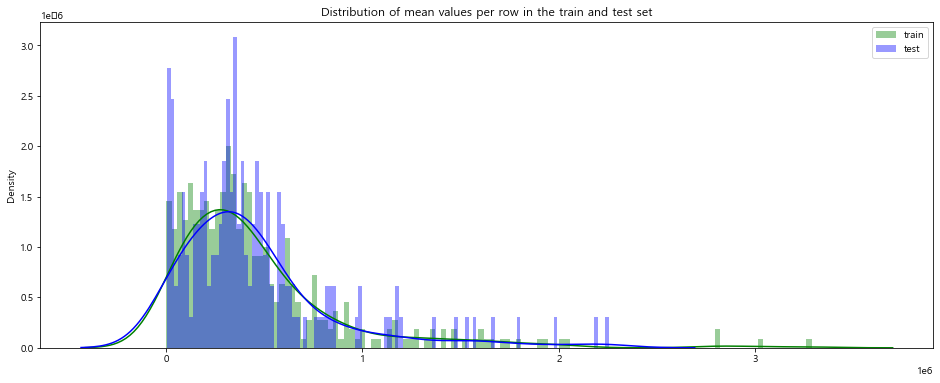

In [18]:
#row끼리 mean 비교
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train_df[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

#### check the distribution of the mean values per columns in the train and test set. (column 끼리 비교는 의미가 있나 싶긴함)

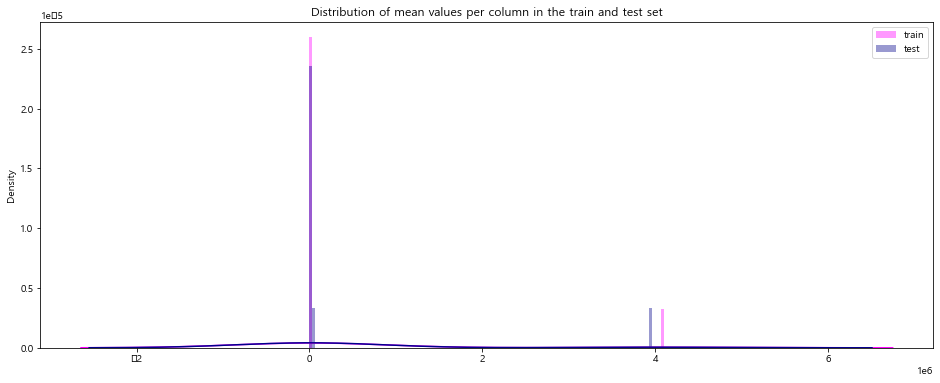

In [19]:
# column끼리 mean 확인
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train_df[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test_df[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

#### check distribution of standard deviation of values per row for train and test datasets.

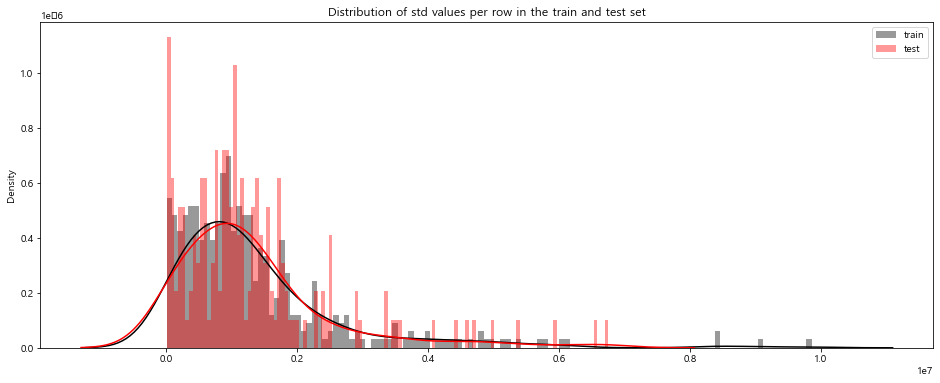

In [20]:
#row 별로 std 확인

plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train_df[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

#### check the distribution of the standard deviation of values per columns in the train and test datasets.

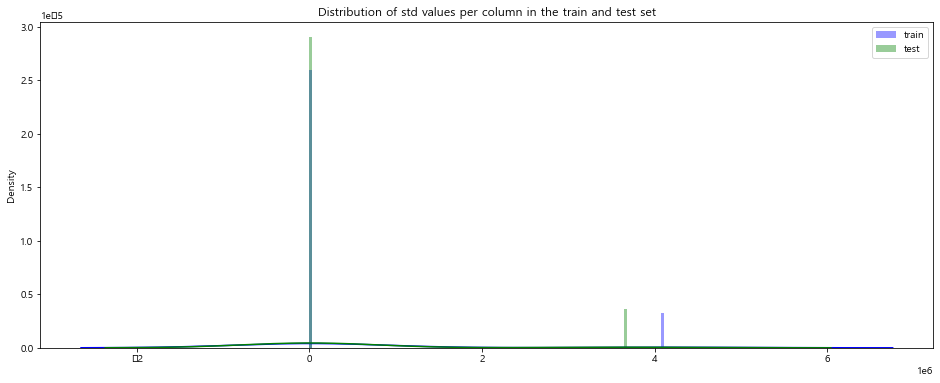

In [21]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train_df[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test_df[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

## Distribution of min and max
- check the distribution of min, max (per row, per column) in the train and test set.

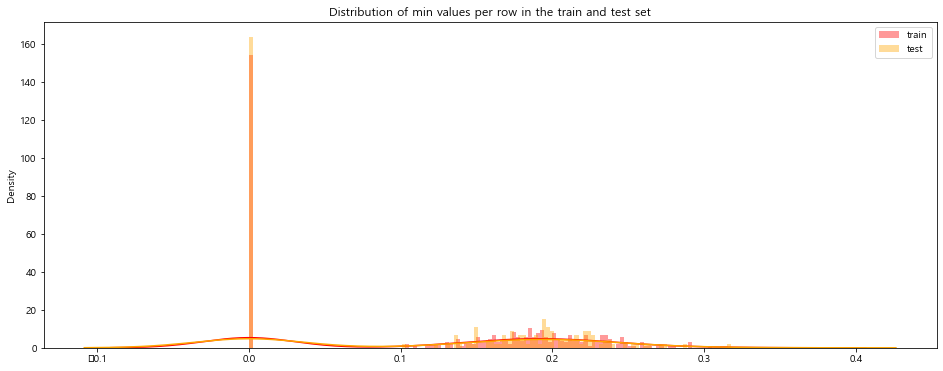

In [22]:
# min values per row
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per row in the train and test set")
sns.distplot(train_df[features].min(axis=1),color="red", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=1),color="orange", kde=True,bins=120, label='test')
plt.legend()
plt.show()

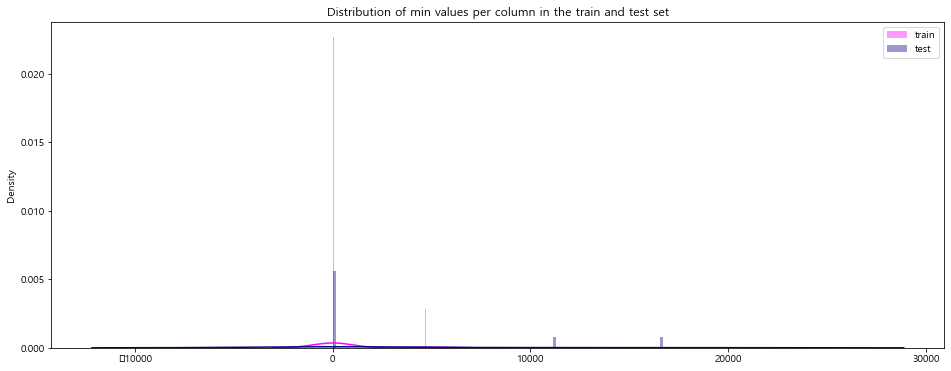

In [23]:
#min values per columns
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of min values per column in the train and test set")
sns.distplot(train_df[features].min(axis=0),color="magenta", kde=True,bins=120, label='train')
sns.distplot(test_df[features].min(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

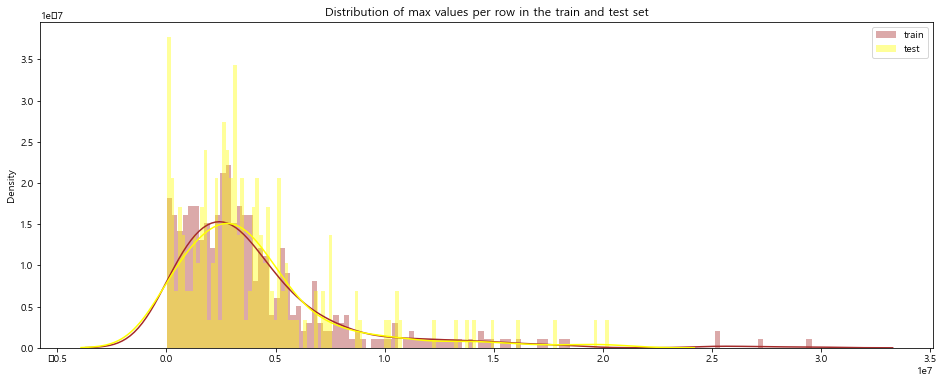

In [24]:
#max values per row
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per row in the train and test set")
sns.distplot(train_df[features].max(axis=1),color="brown", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=1),color="yellow", kde=True,bins=120, label='test')
plt.legend()
plt.show()

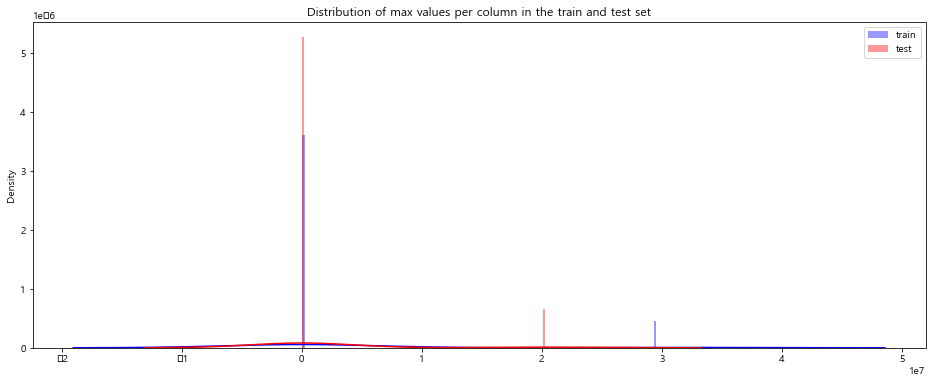

In [25]:
#max values per column
plt.figure(figsize=(16,6))
features = train_df.columns.values[2:202]
plt.title("Distribution of max values per column in the train and test set")
sns.distplot(train_df[features].max(axis=0),color="blue", kde=True,bins=120, label='train')
sns.distplot(test_df[features].max(axis=0),color="red", kde=True,bins=120, label='test')
plt.legend()
plt.show()

#### train set, test set i.i.d 확인